In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import os

# Add the project root to sys.path
project_root = os.path.abspath("../")  # Adjust path if needed
sys.path.append(project_root)

# Now import your model
from LassoHomotopy.model.LassoHomotopy import LassoHomotopyModel, LassoHomotopyResults

# Load dataset
data = []
with open("/Users/ramprakashbollam/Desktop/ML/Project_1/Project1/LassoHomotopy/tests/collinear_data.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if all(v.strip() != "" for v in row.values()):
            data.append({k: float(v) for k, v in row.items()})

# Convert to X and y
X = np.array([[datum[k] for k in datum if k.startswith('X')] for datum in data])
y = np.array([datum['target'] for datum in data])


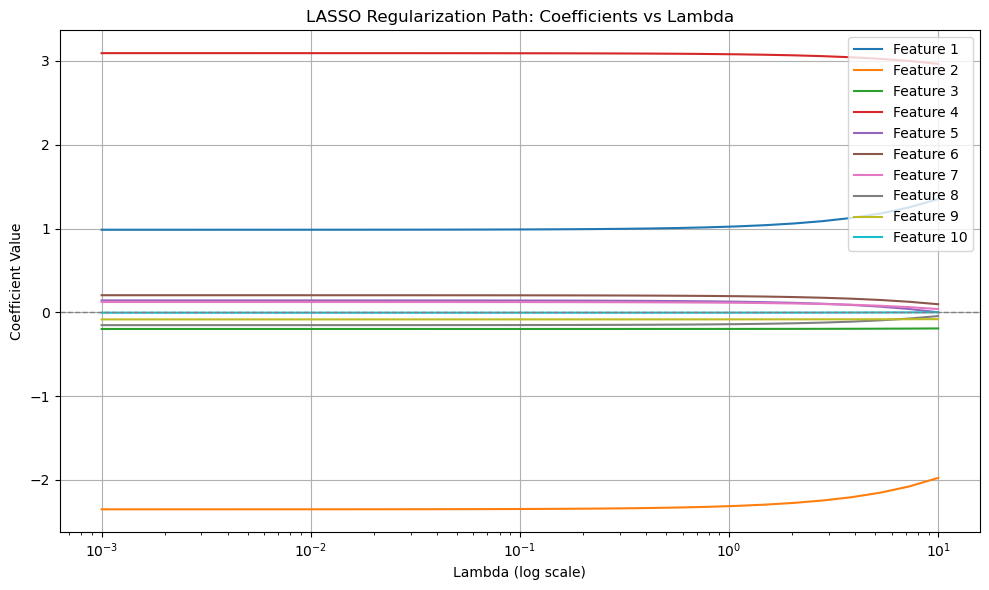

In [6]:
# Lambda range
lambda_values = np.logspace(-3, 1, 30)
coefs = []

# Manually set hyperparameters after creating the model
for lmbda in lambda_values:
    model = LassoHomotopyModel()
    model.lambda_values = [lmbda]       # set single lambda
    model.max_iter = 1000
    model.tol = 1e-6
    model.fit(X, y)
    coefs.append(model.coef_)

coefs = np.array(coefs)

# Plot
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(lambda_values, coefs[:, i], label=f"Feature {i+1}")

plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Coefficient Value")
plt.title("LASSO Regularization Path: Coefficients vs Lambda")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Regularization Path (Coefficients vs Lambda)
The first plot visualizes how the LASSO model shrinks coefficients as the regularization strength (lambda) increases.

    As lambda → 0, the model behaves more like ordinary least squares.
    As lambda → large, many coefficients are pushed toward zero, demonstrating automatic feature selection.
    This is especially useful when working with high-dimensional or collinear data.


In [11]:
results = model.fit(X, y)
preds = results.predict(X)  # ✅ Use result object directly


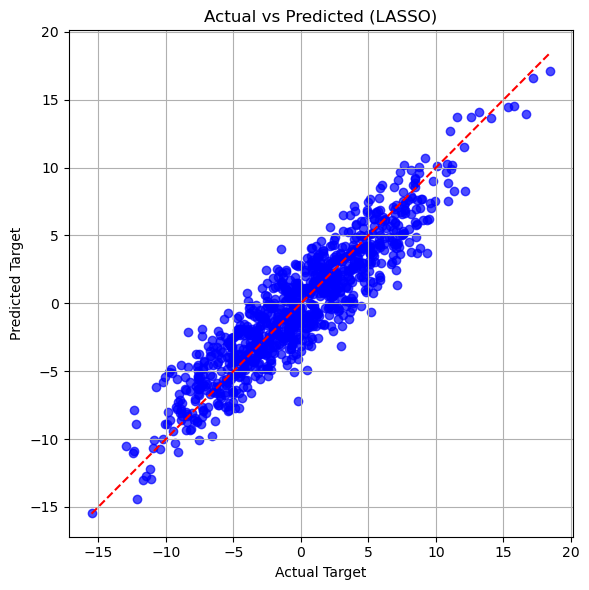

In [12]:
# Train final model using CV
model = LassoHomotopyModel()
model.lambda_values = np.logspace(-3, 1, 10)
model.max_iter = 1000
model.tol = 1e-6
results = model.fit(X, y)
preds = results.predict(X)

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y, preds, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted (LASSO)")
plt.grid(True)
plt.tight_layout()
plt.show()


2. Actual vs Predicted Values:
    The second plot shows model performance after training using cross-validation to select the best lambda.

    Points close to the red dashed line represent accurate predictions.
    The result shows that the model captures the underlying relationship between features and the target variable well.


    Key Takeaways
    LASSO introduces sparsity by penalizing the absolute size of coefficients.
    It’s especially helpful in interpretable modeling and reducing overfitting.
    Coordinate descent provides an efficient way to solve the LASSO optimization problem using only NumPy.